<img src="./img/logo.png" align="right" width="50%"></img>
# iAtlantic GeoNode 101
### Tier 2: How to use OGC webservices offered by the iAtlantic GeoNode in your data analysis

## 2. Visualize data using OGC Web Mapping Service (WMS)

#### OWSlib library - Using WMS from Python



#### <i>Create a WebMapService object</i>

In [1]:
# load owslib library
from owslib.wms import WebMapService

# Create your WebMapService object
wms = WebMapService('http://apps.ecmwf.int/wms/?token=public', version='1.1.1') # version 1.3.0 works as well

#### <i>Request layer information</i>

In [2]:
# See available layers
list(wms.contents)

['t_uerra',
 'z500_public',
 't850_public',
 'ws850_public',
 'composition_aod550',
 'background',
 'composition_bbaod550',
 'boundaries',
 'composition_co2_300hpa',
 'composition_co2_50hpa',
 'composition_co2_500hpa',
 'composition_co2_850hpa',
 'composition_co2_surface',
 'composition_co_300hpa',
 'composition_co_50hpa',
 'composition_co_500hpa',
 'composition_co700',
 'composition_co_850hpa',
 'composition_co_upperlevel',
 'composition_co_surface',
 'composition_uvindex_clearsky',
 'composition_duaod550',
 'efas_radar_haz1h',
 'efas_radar_acc',
 'efas_radar_acc24h',
 'z500_mean_public',
 't850_mean_public',
 'ws850_mean_public',
 'msl_mean_public',
 'z500_spread_public',
 't850_spread_public',
 'ws850_spread_public',
 'msl_spread_public',
 'composition_fire',
 'foreground',
 'composition_hcho_300hpa',
 'composition_hcho_50hpa',
 'composition_hcho_500hpa',
 'composition_hcho_850hpa',
 'composition_hcho_surface',
 'grid',
 'msl_public',
 'composition_ch4_300hpa',
 'composition_ch4_50h

#### <i>Get layer description</i>

In [3]:
wms['composition_co2_surface'].title

'Carbon dioxide at surface [ ppmv ] (provided by CAMS, the Copernicus Atmosphere Monitoring Service)'

#### <i>Get bounding box information in WGS84</i>

In [4]:
wms['composition_co2_surface'].boundingBoxWGS84

(-180.0, -90.0, 180.0, 90.0)

#### <i>Get available styles</i>

In [5]:
wms['composition_co2_surface'].styles

{'sh_RdGy_r_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_RdGy_r_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, RdGy_r colours)'},
 'sh_nipy_spectral_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_nipy_spectral_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, nipy_spectral colours)'}}

#### <i>See available methods</i>

In [6]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### <i>Get available formats</i>

In [7]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/svg+xml',
 'application/pdf',
 'application/postscript',
 'application/vnd.google-earth.kml+xml']

#### <i>Request a map</i>

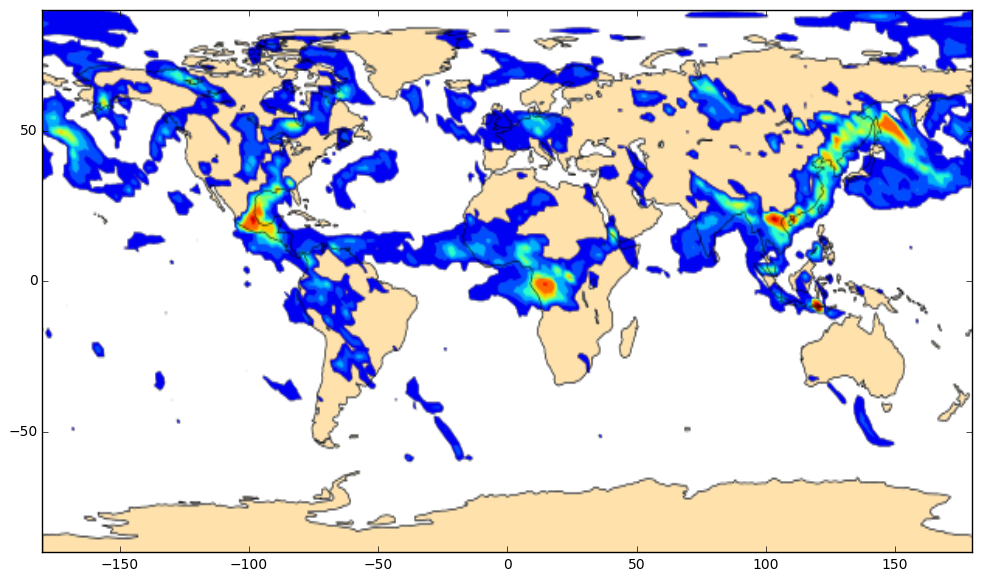

In [8]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(600,300),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()
getMap('foreground',(-180,-90,180,90), 'foreground.png')
getMap('background',(-180,-90,180,90), 'background.png')
getMap('composition_bbaod550',(-180,-90,180,90), 'bbaod550.png')


image1=mpimg.imread('background.png')
image2=mpimg.imread('bbaod550.png')
image3=mpimg.imread('foreground.png')
fig = plt.figure(figsize=(12,7))

img1=plt.imshow(image1,extent=[-180,180,-90,90],aspect='auto')
img2=plt.imshow(image2,extent=[-180,180,-90,90],aspect='auto')
img3=plt.imshow(image3,extent=[-180,180,-90,90],aspect='auto')
plt.show()